<a href="https://colab.research.google.com/github/jiho-kang/DL_CNN_STUDY/blob/main/06_ImageDataGenerator_Aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [ ]:
!wget https://www.sciencenews.org/wp-content/uploads/2020/03/033120_HT_covid-cat_feat-1028x579.jpg

--2022-02-15 23:39:41--  https://www.sciencenews.org/wp-content/uploads/2020/03/033120_HT_covid-cat_feat-1028x579.jpg
Resolving www.sciencenews.org (www.sciencenews.org)... 23.185.0.2, 2620:12a:8000::2
Connecting to www.sciencenews.org (www.sciencenews.org)|23.185.0.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61745 (60K) [image/jpeg]
Saving to: ‘033120_HT_covid-cat_feat-1028x579.jpg’

033120_HT_covid-cat 100%[===================>]  60.30K  --.-KB/s    in 0.001s  

2022-02-15 23:39:41 (48.2 MB/s) - ‘033120_HT_covid-cat_feat-1028x579.jpg’ saved [61745/61745]



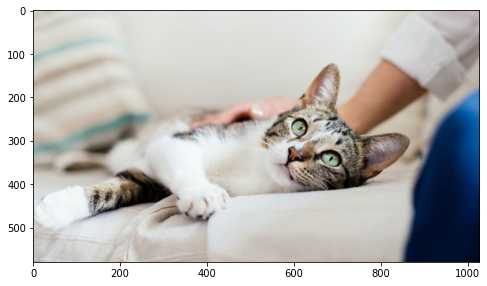

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.cvtColor(cv2.imread('033120_HT_covid-cat_feat-1028x579.jpg'), cv2.COLOR_BGR2RGB) # cv2.imread로 이미지 파일을 BGR numpy array로 올리고, cvtColor로 RGB로 바꿔줌.

def show_image(image):
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    # plt.axis('off')
    # print('image shape:', image.shape)
    
show_image(image)

## ImageDataGenerator를 이용하여 Augmentation 적용하기
* ImageDataGenerator는 fit(), flow()를 통해서 입력된 image array(numpy)를 변환 동작시킬 수 있으며, 실제 변환은 next()등으로 iteration 호출해야 함
* ImageDataGenerator가 입력으로 받는 image array는 batch를 포함한 4차원 array임. 즉 [579, 1028, 3] shape인 image array가 입력되면 이를 4차원 형태인 [1, 579, 1028, 3] 으로 변경해야 함.
* 변경된 pixel값은 float이므로 이를 다시 int형으로 변경해서 시각화 필요.

### 좌우, 상하 반전(Horizontal Flip, Vertical Flip)
* horizontal_flip=True로 좌우 반전 적용. 하지만 반드시 변환하는 것은 아니며 Random하게 원본 데이터를 유지하거나 변환 결정
* vertical_flip=True로 상하 반전 적용. 마찬가지로 반드시 변환하는 것은 아니며 Random하게 원본 데이터를 유지하거나 변환 결정

before batch_image shape: (579, 1028, 3)
image_batch shape: (1, 579, 1028, 3)
aug_image shape: (579, 1028, 3)


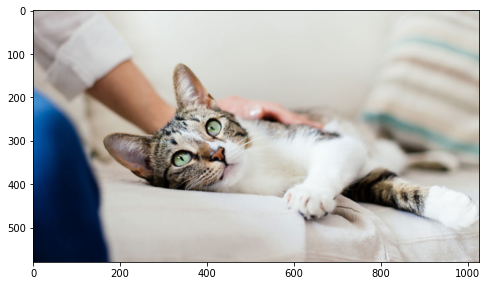

In [ ]:
# 아래는 거의 쓸 일 없는 코드임. ImageDataGenerator는 여러개의 파라미터를 True로 한번에 주기 때문

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Horizontal Flip(좌우 반전)을 적용. horizontal_flip=True을 적용했지만 반드시 변환하는 것은 아님. Random하게 원본 데이터를 유지하거나 변환 결정. 
data_generator = ImageDataGenerator(horizontal_flip=True)

# ImageDataGenerator는 여러개의 image를 입력으로 받음. 따라서 3차원이 아니라 batch를 포함한 4차원 array를 입력받음. np.expand_dims()로 차원 증가.
print('before batch_image shape:', image.shape)
image_batch = np.expand_dims(image, axis=0)
print('image_batch shape:', image_batch.shape)

# ImageDataGenerator 적용. fit()후 flow()로 image batch를 넣어주어야 함. | 데이터 파이프라인을 만드는 메커니즘
data_generator.fit(image_batch)
data_gen_iter = data_generator.flow(image_batch)

# ImageDataGenerator를 동작하기 위해서는 next()등으로 iteration을 호출해야함. 
aug_image_batch = next(data_gen_iter)

# 반환된 데이터는 batch까지 포함된 4차원 array이므로 다시 3차원 image array로 변환. 
aug_image = np.squeeze(aug_image_batch)
print('aug_image shape:', aug_image.shape)

# 반환된 pixel값은 float임. 이를 다시 int형으로 변경 후, 이미지 시각화 
aug_image = aug_image.astype('int')
show_image(aug_image)

### 여러 이미지의 ImageDataGenerator 변환을 수행하는 함수 생성 
* ImageDataGenerator는 next()로 호출이 될 때마다 Random하게 Augmentation 적용이 설정되어 변환됨. 

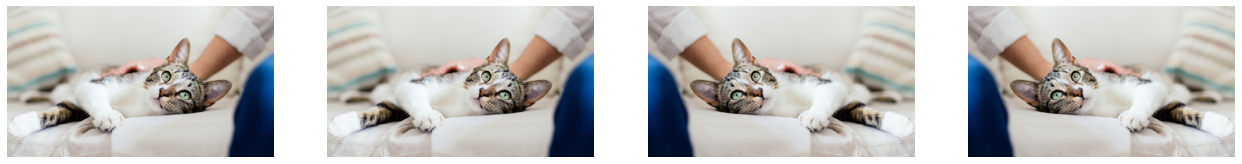

In [ ]:
N_IMAGES = 4 # 변환을 몇 번 할거냐
fig, axs = plt.subplots(nrows=1, ncols=N_IMAGES, figsize=(22, 8))

for i in range(N_IMAGES):
    aug_image_batch = next(data_gen_iter)
    aug_image = np.squeeze(aug_image_batch)
    aug_image = aug_image.astype('int')
    axs[i].imshow(aug_image)
    axs[i].axis('off')

In [ ]:
# ImageDataGenerator 객체를 입력하면 augmentation 적용된 일련의 image들을 시각화 해주는 함수 생성. 
def show_aug_image_batch(image, data_generator, n_images=4, to_int=True):
    
    image_batch = np.expand_dims(image, axis=0)
    # ImageDataGenerator 적용. fit()후 flow()로 image batch를 넣어주어야 함. 
    data_generator.fit(image_batch)
    data_gen_iter = data_generator.flow(image_batch)
    
    fig, axs = plt.subplots(nrows=1, ncols=n_images, figsize=(6*n_images, 8))

    for i in range(n_images):
        aug_image_batch = next(data_gen_iter)
        aug_image = np.squeeze(aug_image_batch)
        if(to_int):
            aug_image = aug_image.astype('int')
        axs[i].imshow(aug_image)
        axs[i].axis('off')


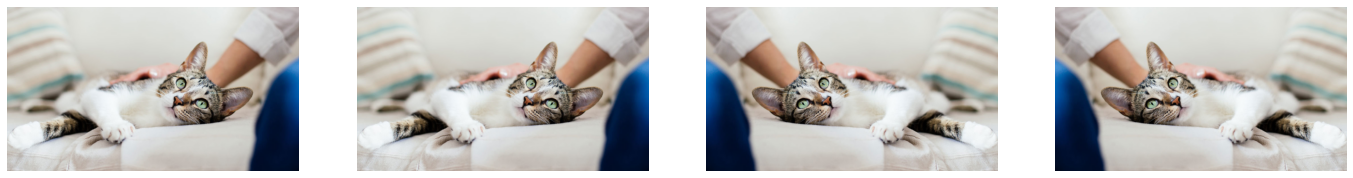

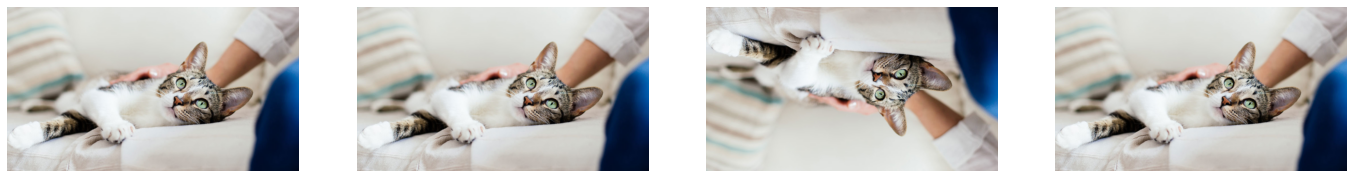

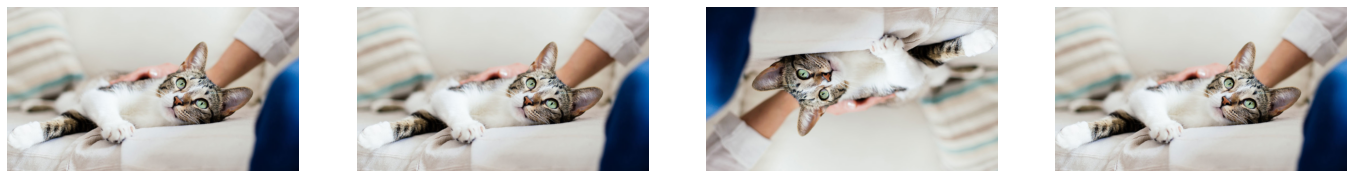

In [ ]:
# Horizontal Flip(좌우 반전)을 적용. horizontal_flip=True을 적용했지만 반드시 변환하는 것은 아님. Random하게 원본 데이터를 유지하거나 변환 결정. 
data_generator = ImageDataGenerator(horizontal_flip=True)
show_aug_image_batch(image, data_generator, n_images=4)

# Vertical Flip(좌우 반전)을 적용. vertical_flip=True을 적용했지만 반드시 변환하는 것은 아님. Random하게 원본 데이터를 유지하거나 변환 결정. 
data_generator = ImageDataGenerator(vertical_flip=True)
show_aug_image_batch(image, data_generator, n_images=4)

# 두개를 함께 적용. 
data_generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
show_aug_image_batch(image, data_generator, n_images=4)

### 이미지 Rotation(회전) 적용 - 여기부터 공간 레벨 변형

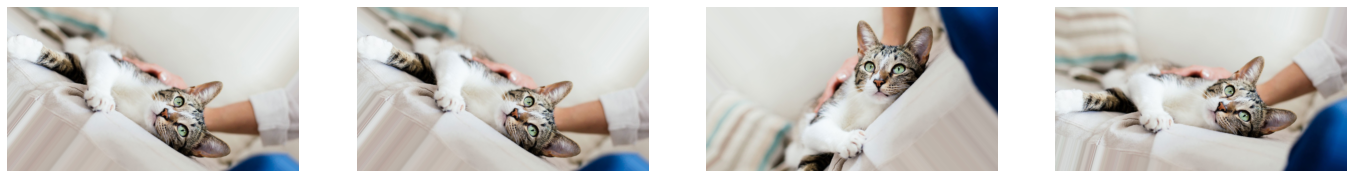

In [ ]:
# rotation 범위를 -45 ~ 45도로 설정.         
data_gen = ImageDataGenerator(rotation_range=45)
show_aug_image_batch(image, data_gen, n_images=4)


### 이미지 좌우,상하 이동(Shift) - Translate
* width_shift_range, height_shift_range 입력 인자를 통해 좌우, 상하 이동. 
* width_shift_range, height_shift_range 값은 0 ~ 1 사이 값 부여. (0.4일 경우, 최대 40%까지 이동) 
- 수행 시 마다 전체 이미지 대비 해당 범위의 값 비율만큼 Random 하게 이동.
* 이동하게 되면 이동되고 남아있는 공간은 비어있게 되는데 이를 어떻게 채울치는 fill_mode 인자로 결정
* fill_mode는 아래와 같이 설정
* * (default) nearest: 가장 빈공간에 가장 근접한 pixel로 채우기
* * reflect: 빈공간 만큼의 영역을 근처 공간으로 채우되 마치 거울로 반사되는 이미지를 보듯이 채움. 
* * wrap: 빈공간을 이동으로 잘려나간 이미지로 채움
* * constant: 특정 픽셀값으로 채움. 이때 특정 픽셀값은 cval 값으로 채움. cval=0 이면 검은색 픽셀로 채움


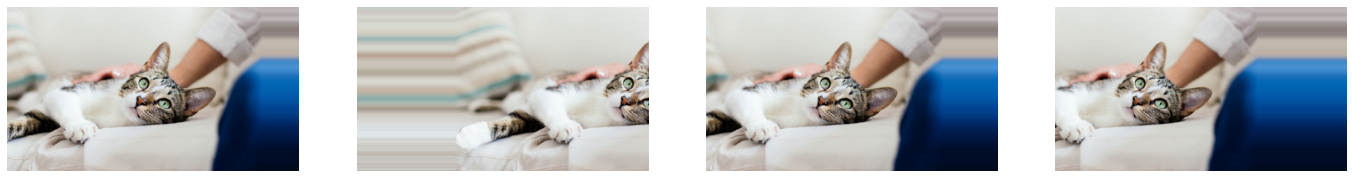

In [ ]:
# 왼쪽 또는 오른쪽으로 이미지 이동을 주어진 width_shift_range에 따라 random하게 수행. 
data_generator = ImageDataGenerator(width_shift_range=0.4)
show_aug_image_batch(image, data_generator, n_images=4)

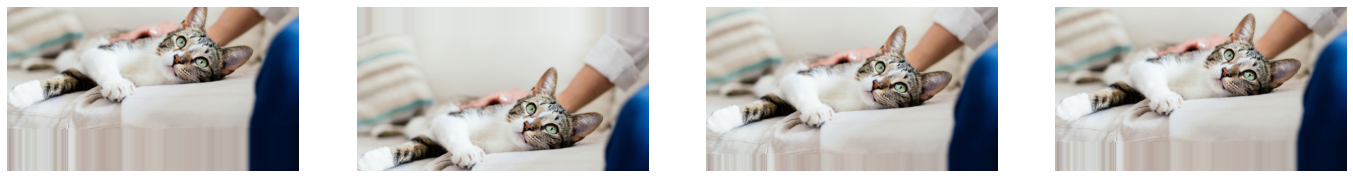

In [ ]:
# 위쪽 또는 아래쪽 이미지 이동을 주어진 height_shift_range에 따라 random하게 수행.
data_generator = ImageDataGenerator(height_shift_range=0.4)
show_aug_image_batch(image, data_generator, n_images=4)

# 빈공간을 가장 가까운 곳의 픽셀값으로 채움. 
# 빈공간 만큼의 영역을 근처 공간으로 반사해서 채움. 
# 빈공간을 이동으로 잘려나간 이미지로 채움
# 특정 픽셀값으로 채움. 이때 특정 픽셀값은 cval 값으로 채움


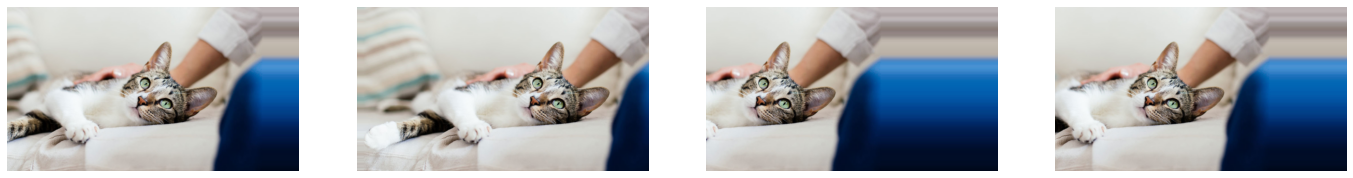

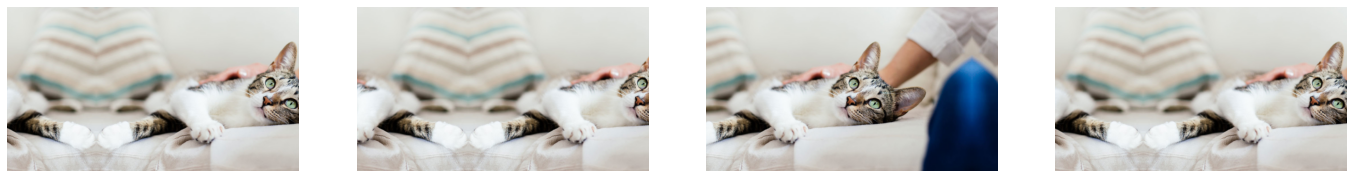

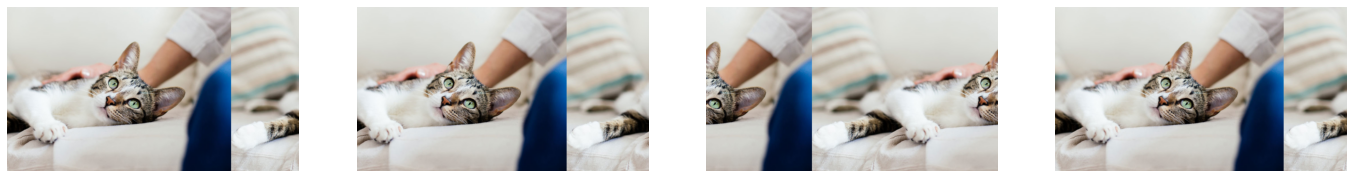

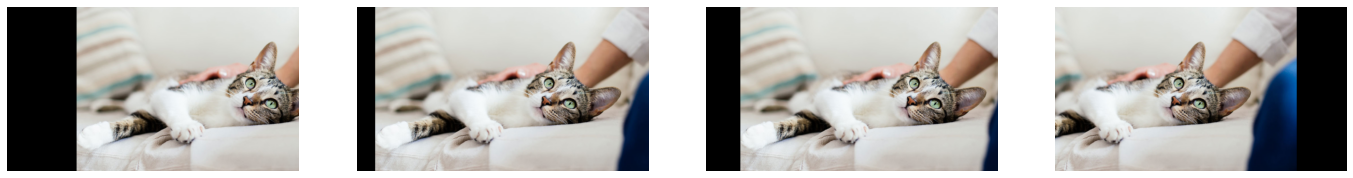

In [ ]:
print('# 빈공간을 가장 가까운 곳의 픽셀값으로 채움. ')
data_generator = ImageDataGenerator(width_shift_range=0.4, fill_mode='nearest')
show_aug_image_batch(image, data_generator, n_images=4)

print('# 빈공간 만큼의 영역을 근처 공간으로 반사해서 채움. ')
data_generator = ImageDataGenerator(width_shift_range=0.4, fill_mode='reflect')
show_aug_image_batch(image, data_generator, n_images=4)

print('# 빈공간을 이동으로 잘려나간 이미지로 채움')
data_generator = ImageDataGenerator(width_shift_range=0.4, fill_mode='wrap')
show_aug_image_batch(image, data_generator, n_images=4)

print('# 특정 픽셀값으로 채움. 이때 특정 픽셀값은 cval 값으로 채움')
data_generator = ImageDataGenerator(width_shift_range=0.4, fill_mode='constant', cval=0)
show_aug_image_batch(image, data_generator, n_images=4)

### Zoom(Scale) 적용
* Zoom은 zoom_range을 설정하여 적용. zoom_range가 1보다 작으면 확대(Zoom In), 1보다 크면 축소(Zoom Out)
* 축소 시 빈 공간은 fill_mode에 따라 픽셀을 채움. Default는 nearest 

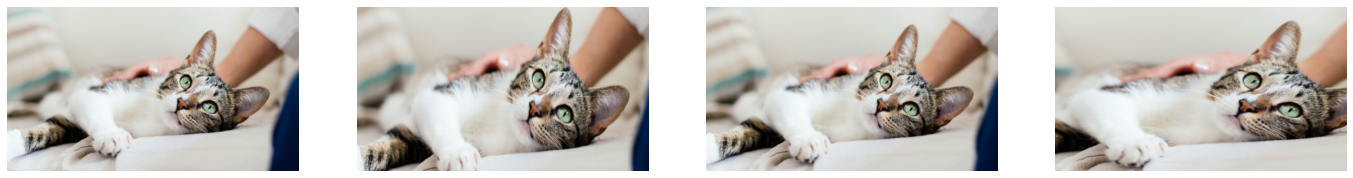

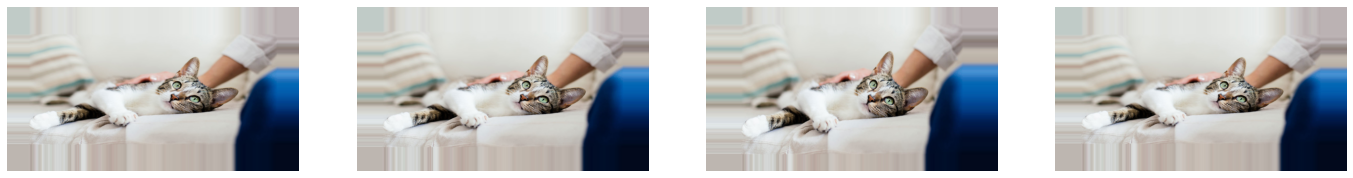

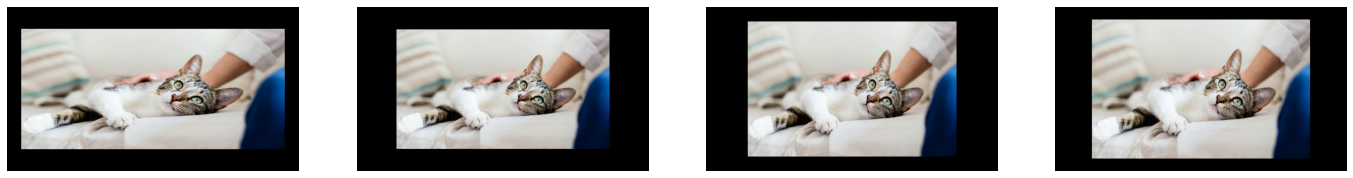

In [ ]:
# Zoom In(확대)
data_generator = ImageDataGenerator(zoom_range=[0.5, 0.9])
show_aug_image_batch(image, data_generator, n_images=4)

# Zoom out(축소)
data_generator = ImageDataGenerator(zoom_range=[1.1, 1.5])
show_aug_image_batch(image, data_generator, n_images=4)

# Zoom out 시 비어 있는 공간 채우기 
data_generator = ImageDataGenerator(zoom_range=[1.1, 1.5], fill_mode='constant', cval=0)
show_aug_image_batch(image, data_generator, n_images=4)

### Shear 적용
shear_range로 이용하여 적용. shear_range=45일 경우 -45 ~ 45 도 사이에서 변환 적용

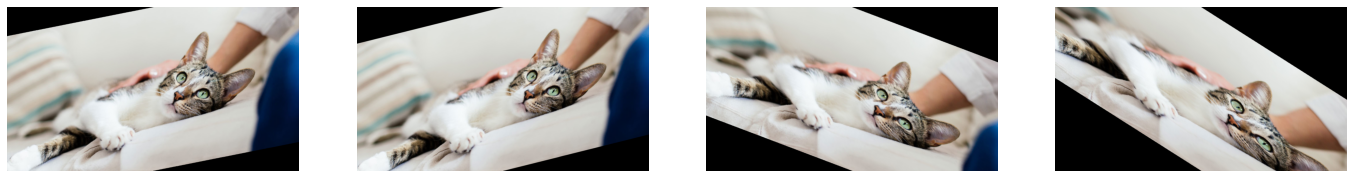

In [ ]:
data_generator = ImageDataGenerator(shear_range=45, fill_mode='constant', cval=0)
show_aug_image_batch(image, data_generator, n_images=4)

### Bright 적용 - 여기부터 픽셀 레벨 변형
- brightness_range 로 밝기 조절. 0~1 사이 값이 입력 되며, 0에 가까울수록 원본 이미지 보다 더 어둡고, 1보다 커질 수록 원본 이미지 보다 밝음. 
- range로 넣어야 함. 정수X


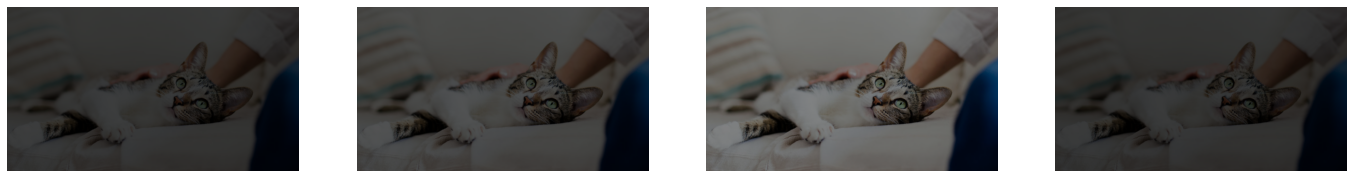

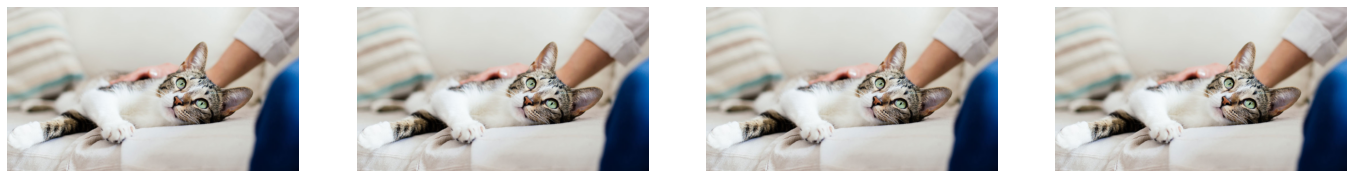

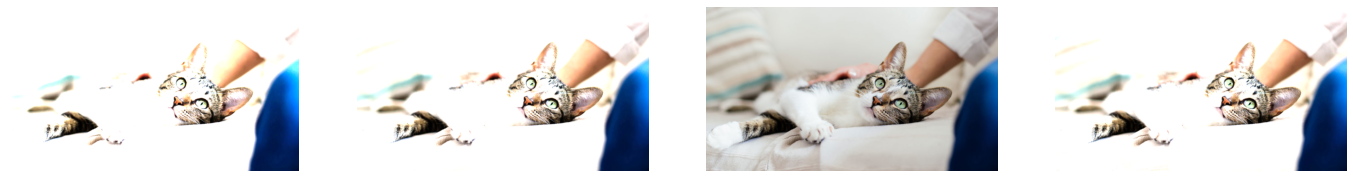

In [ ]:
# 어두워짐
data_generator = ImageDataGenerator(brightness_range=(0.1, 0.9))
show_aug_image_batch(image, data_generator, n_images=4)

# 동일
data_generator = ImageDataGenerator(brightness_range=(1.0, 1.0))
show_aug_image_batch(image, data_generator, n_images=4)

# 밝아짐
data_generator = ImageDataGenerator(brightness_range=(1.0, 2.0))
show_aug_image_batch(image, data_generator, n_images=4)
#show_aug_image_batch(image, data_generator, n_images=4)

### Channel Shift
* 원본 이미지의 RGB Pixel값을 channel_shift_range 범위에 있는 임의의 값으로 변환.
- n만큼 더하거나 빼서 픽셀값 수정 (0~255를 벗어나진 않음).

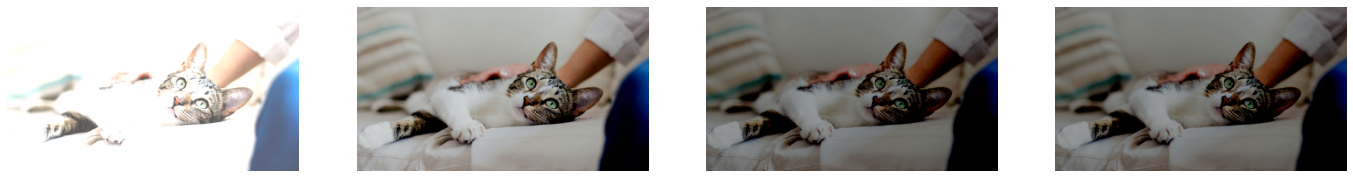

In [ ]:
data_generator = ImageDataGenerator(channel_shift_range=150.0)
show_aug_image_batch(image, data_generator, n_images=4)

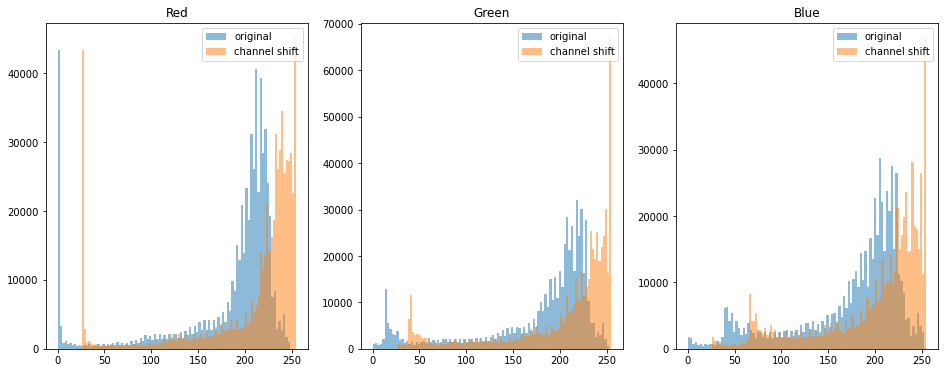

In [ ]:
# 주의: aug_image를 int형으로 변환하지 않고 float으로 그대로 유지하여 반환. 
def get_aug_image(image, data_generator):
    # ImageDataGenerator는 여러개의 image를 입력으로 받음. 따라서 3차원이 아니라 batch를 포함한 4차원 array를 입력받음. np.expand_dims()로 차원 증가.
    image_batch = np.expand_dims(image, axis=0)

    # ImageDataGenerator 적용. fit()후 flow()로 image batch를 넣어주어야 함. 
    data_generator.fit(image_batch)
    data_gen_iter = data_generator.flow(image_batch)

    # ImageDataGenerator를 동작하기 위해서는 next()등으로 iteration을 호출해야함. 
    aug_image_batch = next(data_gen_iter)

    # 반환된 데이터는 batch까지 포함된 4차원 array이므로 다시 3차원 image array로 변환. 
    aug_image = np.squeeze(aug_image_batch)

    ### aug_image를 int형으로 변환하지 않고 float으로 그대로 유지.  
    aug_image = aug_image
    
    return aug_image

data_generator = ImageDataGenerator(channel_shift_range=150.0)
aug_image = get_aug_image(image, data_generator)


# RGB 모든 채널에 대해서 원본과 변환 이미지 Pixel값의 Histogram 시각화 
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

for i in range(3):
    # i값 0 일때 Red 채널, i값 1일때 Green Channel, i값 2일때 Blue Channel Histogram 표현 
    axs[i].hist(image[:, :, i].flatten(), bins=100, alpha=0.5, label="original")
    axs[i].hist(aug_image[:, :, i].flatten(), bins=100, alpha=0.5, label="channel shift")
    axs[i].legend(loc='upper right')
    if i==0:
        title_str = 'Red'
    elif i==1:
        title_str = 'Green'
    else: 
        title_str = 'Blue'
    axs[i].set(title=title_str)

### ZCA Whitening - 백색잡음인데, 수행하면 세션다운되니 생략


In [ ]:
# data_generator = ImageDataGenerator(zca_whitening=True, zca_epsilon=1e-05)
# aug_image = get_aug_image(image, data_generator)


### Normalization
* 일반적으로 augmentation 용도가 아닌 CNN 입력 값으로 Pixel값 변환을 위해,

  3번) 0~1사이의 값으로 변환 or 1,2번) 채널별 Z score변환(평균 0, 표준편차 1) 적용 
* featurewise_center = True이면 R, G, B 각 픽셀값에서 개별 채널들의 평균 픽셀값을 빼서 평균을 0으로 함. 
* featurewise_std_normalization = True이면 R, G, B 각 픽셀값에서 개별 채널들의 표준 편차값으로 나눔. 
* rescale = 255.0 각 픽셀값을 0 ~ 1사이의 값으로 만들기 위해서 보통 255.0 으로 나눔. 

In [ ]:
r_mean = np.mean(image[:, :, 0])
g_mean = np.mean(image[:, :, 1])
b_mean = np.mean(image[:, :, 2])

r_std = np.std(image[:, :, 0])
g_std = np.std(image[:, :, 1])
b_std = np.std(image[:, :, 2])

print(r_mean, g_mean, b_mean, r_std, g_std, b_std )

r_zscore = (image[:, :, 0] - r_mean)/r_std
g_zscore = (image[:, :, 1] - g_mean)/g_std
b_zscore = (image[:, :, 2] - b_mean)/b_std

#print(r_zscore, g_zscore, b_zscore)

178.1461227260203 176.28255646727553 173.6606738439413 65.90277949962356 62.48317182871674 57.52425459226215


In [ ]:
data_generator = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
image_batch = np.expand_dims(image, axis=0)
# ImageDataGenerator 적용. fit()후 flow()로 image batch를 넣어주어야 함. 
data_generator.fit(image_batch)
print(data_generator.mean, data_generator.std)


[[[178.0238  176.30089 173.7162 ]]] [[[65.88598  62.47825  57.526283]]]


In [ ]:
data_generator = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
image_batch = np.expand_dims(image, axis=0)
# ImageDataGenerator 적용. fit()후 flow()로 image batch를 넣어주어야 함. 
data_generator.fit(image_batch)
data_gen_iter = data_generator.flow(image_batch)

# ImageDataGenerator를 동작하기 위해서는 next()등으로 iteration을 호출해야함. 
aug_image_batch = next(data_gen_iter)

# 반환된 데이터는 batch까지 포함된 4차원 array이므로 다시 3차원 image array로 변환. 
aug_image = np.squeeze(aug_image_batch)
aug_image

array([[[ 0.21212701,  0.42733452,  0.43951732],
        [ 0.22730476,  0.4433401 ,  0.4569007 ],
        [ 0.2424825 ,  0.45934564,  0.47428405],
        ...,
        [ 0.13623834,  0.02719526,  0.09185016],
        [ 0.13623834,  0.02719526,  0.09185016],
        [ 0.13623834,  0.02719526,  0.09185016]],

       [[ 0.22730476,  0.4433401 ,  0.4569007 ],
        [ 0.2424825 ,  0.45934564,  0.47428405],
        [ 0.25766024,  0.4433401 ,  0.47428405],
        ...,
        [ 0.13623834,  0.02719526,  0.09185016],
        [ 0.13623834,  0.02719526,  0.09185016],
        [ 0.13623834,  0.02719526,  0.09185016]],

       [[ 0.2424825 ,  0.45934564,  0.47428405],
        [ 0.27283797,  0.45934564,  0.4916674 ],
        [ 0.2880157 ,  0.4753512 ,  0.5090508 ],
        ...,
        [ 0.13623834,  0.02719526,  0.09185016],
        [ 0.13623834,  0.02719526,  0.09185016],
        [ 0.13623834,  0.02719526,  0.09185016]],

       ...,

       [[ 0.22730476,  0.15523982,  0.10923351],
        [ 0

In [ ]:
data_generator = ImageDataGenerator(rescale=1/255.0)
aug_image = get_aug_image(image, data_generator)
print(aug_image)

[[[0.75294125 0.7960785  0.7803922 ]
  [0.7568628  0.8000001  0.7843138 ]
  [0.7607844  0.80392164 0.78823537]
  ...
  [0.73333335 0.69803923 0.7019608 ]
  [0.73333335 0.69803923 0.7019608 ]
  [0.73333335 0.69803923 0.7019608 ]]

 [[0.7568628  0.8000001  0.7843138 ]
  [0.7607844  0.80392164 0.78823537]
  [0.76470596 0.8000001  0.78823537]
  ...
  [0.73333335 0.69803923 0.7019608 ]
  [0.73333335 0.69803923 0.7019608 ]
  [0.73333335 0.69803923 0.7019608 ]]

 [[0.7607844  0.80392164 0.78823537]
  [0.7686275  0.80392164 0.79215693]
  [0.7725491  0.8078432  0.7960785 ]
  ...
  [0.73333335 0.69803923 0.7019608 ]
  [0.73333335 0.69803923 0.7019608 ]
  [0.73333335 0.69803923 0.7019608 ]]

 ...

 [[0.7568628  0.7294118  0.7058824 ]
  [0.7686275  0.7411765  0.7176471 ]
  [0.7137255  0.6784314  0.65882355]
  ...
  [0.00784314 0.03529412 0.10980393]
  [0.00784314 0.03529412 0.10980393]
  [0.00784314 0.03529412 0.10980393]]

 [[0.72156864 0.69411767 0.67058825]
  [0.7411765  0.7137255  0.6901961 ]


### Putting all together

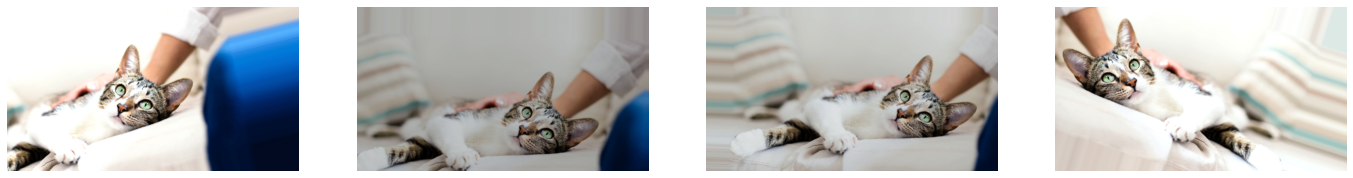

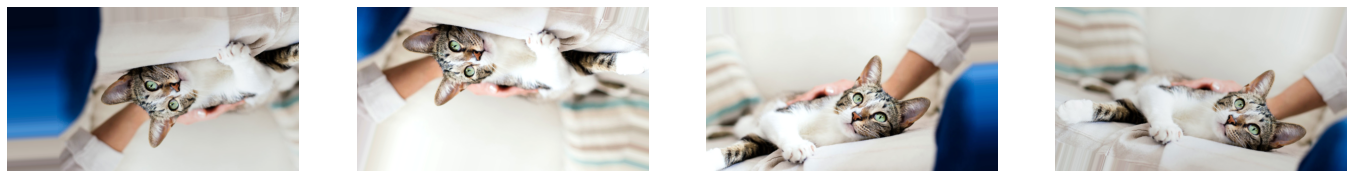

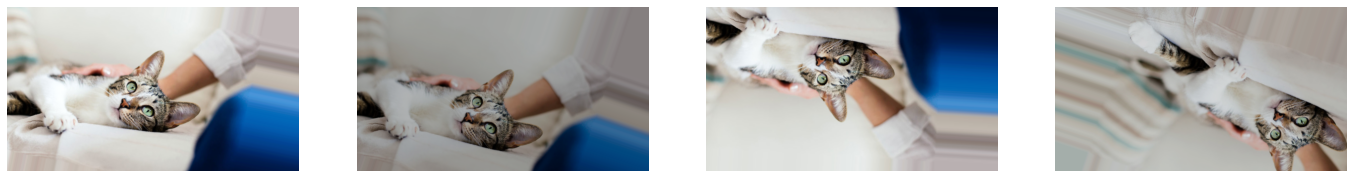

In [ ]:
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.7, 1.3),
    horizontal_flip=True,
    vertical_flip=True,
    #rescale=1/255.0
)

show_aug_image_batch(image, data_generator, n_images=4)
show_aug_image_batch(image, data_generator, n_images=4)
show_aug_image_batch(image, data_generator, n_images=4)